# Tidy Tuesday 1

In this activity, the dataset of Video Games Sales provided by Gregory Smith scraped from [VGChartz](vgchartz.com) will be analyzed. This dataset consists of 16,598 games that is above 100,000 sales.

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

%matplotlib inline

data = pd.read_csv('data/vgsales.csv')

data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Preparation

before analyzing the data, we would first be preparing by cleaning and removing incomplete data either from a record.

In [3]:
data.shape

(16598, 11)

In [4]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [17]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Analysis

Since there are missing values, in the year and publisher column, instead of deleting the data, a sentinel value will be provided. In addition, after examining the datatypes, we noticed that the year is of type float instead of an integer.

In [5]:
data.Year = data.Year.fillna(9999)

In [6]:
data.Publisher = data.Publisher.fillna("N/A")

In [7]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
data.Year = data.Year.astype(int)

In [9]:
data.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Data Analysis

Now that the data has been cleaned, we can begin to analyze. In this section, the dataset will be analyzed through aggregagation or grouping. 

### Initial Observation

We could already see that the Top 5 Global Sales are from the same developer, Nintendo.


Now we will be looking at the global sales per year, platform, genre, publisher, and title.

In [10]:
salesPerYear = data.groupby('Year')['Global_Sales'].sum().to_frame().sort_values(by=['Global_Sales'], ascending=False)
salesPerYear.columns = ['Global_Sales']
salesPerYear.head(5)

,Global_Sales
Year,
2008,678.90
2009,667.30
2007,611.13
2010,600.45
2006,521.04


In [11]:
salesPerYear.tail(5)

,Global_Sales
Year,
1987,21.74
1983,16.79
1980,11.38
2020,0.29
2017,0.05


### Observation

It can be seen that the top 5 years of the Highest Grossing Sales were on the years 2006-2010 with 2008 being the year of the Highest Grossing Sale of Video Games globally. On the other hand, it can be seen that the years 2017 and 2020 have a suprisingly low global sales. One factor that may have contributed to this result is that the data gathered/ scraped were outdated thus the sales from 2017-2020 were incomplete.

Now we analyze the global sales per platform.

In [12]:
salesPerPlatform = data.groupby('Platform')['Global_Sales'].sum().to_frame().sort_values(by=['Global_Sales'], ascending=False)
salesPerPlatform.columns = ['Global_Sales']
salesPerPlatform.head(5)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


In [13]:
salesPerPlatform.tail(5)

,Global_Sales
Platform,
WS,1.42
TG16,0.16
3DO,0.10
GG,0.04
PCFX,0.03


### Observation

Suprisingly, it can be seen that the highest grossing platform was the PlayStation 2 which is 3 console generations ago already. This was followed by the Xbox 360 and its successor, the Playstation 3 which are also platforms that are already 2 generations ago. 

Another thing to look at is that the lowest global sales were from various unpopular Japanese consoles.

In [14]:
salesPerGenre = data.groupby('Genre')['Global_Sales'].sum().to_frame().sort_values(by=['Global_Sales'], ascending = False)
salesPerGenre.columns = ['Global_Sales']
salesPerGenre.shape

(12, 1)

In [53]:
salesPerGenre.head(12)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


### Observation

Action, Sports, and Shooter respectively are the top 3 genre with the highest global sales. On the other hand, genres like Puzzle, Adventure, and Strategy were at the bottom.

Lastly, we will be looking at the global sales per publisher

In [15]:
salesPerPublisher = data.groupby('Publisher')['Global_Sales'].sum().to_frame().sort_values(by=['Global_Sales'], ascending=False)
salesPerPublisher.columns = ['Global_Sales']
salesPerPublisher.head(5)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72


In [57]:
salesPerPublisher.tail(10)

,Global_Sales
Publisher,
Genterprise,0.01
New World Computing,0.01
Otomate,0.01
Ascaron Entertainment,0.01
Stainless Games,0.01
Ongakukan,0.01
Commseed,0.01
Takuyo,0.01
Boost On,0.01


### Observation

The top company or publisher with the global sales is Nintendo which was actually initially observed from the start with the top 5 video games coming from the said company. This was followed by EA, Activision, Sony Computer Entertainment, and Ubisoft respectively. Similar to what was observed on the bottom list of the global sales per platform, some of the lowest global sales per publisher were from various indie Japanese companies.

Now, we look at the the top 10 video games with the highest global sales. 


In [86]:
salesPerTitle = data.groupby('Name')['Global_Sales'].sum().to_frame().sort_values(by=['Global_Sales'], ascending=False)
salesPerTitle.columns = ['Global_Sales']
salesPerTitle.head(10)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


### Observation

We see that the top 1 game with the highest global sales is the Wii Sports it is then followed by Grand Theft Auto V however it trailed by a large margin.

Now, we evaluate the average regional sales.

In [33]:
regionalSales= []
regionalSales.append(data['NA_Sales'].mean())
regionalSales.append(data['EU_Sales'].mean())
regionalSales.append(data['JP_Sales'].mean())
regionalSales.append(data['Other_Sales'].mean())
regionalSales


regionalSalesDf = pd.DataFrame(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
regionalSalesDf.loc[0] = [regionalSales[0] , regionalSales[1] , regionalSales[2] , regionalSales[3]]
regionalSalesDf['Total_Sales'] = sum(regionalSales)

# Transform to Percentage

for column in regionalSalesDf:
    regionalSalesDf[column] = regionalSalesDf[column] / regionalSalesDf['Total_Sales'] * 100

regionalSalesDf.pop('Total_Sales')
regionalSalesDf


    


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,49.271242,27.301155,14.480055,8.947548


### Observation

Based from the table, it can be seen that most of the video game sales comes from North America

## Data Visualization

Now that we have analyzed the data, we will now be visualizing them.

### Top Years in Global Sales

To start we will be visualizing the Top Years in Global Sales through a simple bar chart.

Text(0, 0.5, 'Years')

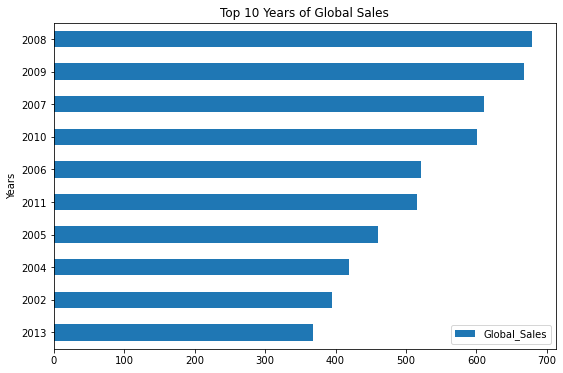

In [57]:
vizSalesYear = salesPerYear.reset_index()

vizSalesYearTopTen = vizSalesYear.head(10).sort_values(by=['Global_Sales'],ascending=True)

ax = vizSalesYearTopTen.plot.barh(figsize=(9,6), x='Year', y='Global_Sales')
ax.set_title("Top 10 Years of Global Sales")
ax.set_ylabel('Years')

### Top and Bottom 3 Global Sales in Genres

Now, we visualize the top and global sales in terms of genre based from the data gathered above.

Text(0, 0.5, 'Genres')

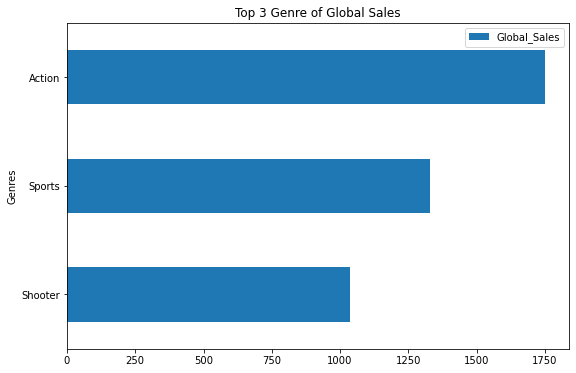

In [58]:
vizSalesGenre = salesPerGenre.reset_index()

vizSalesGenreTopThree = vizSalesGenre.head(3).sort_values(by=['Global_Sales'],ascending=True)

bx = vizSalesGenreTopThree.plot.barh(figsize=(9,6), x='Genre', y='Global_Sales')
bx.set_title("Top 3 Genre of Global Sales")
bx.set_ylabel('Genres')

Text(0, 0.5, 'Genres')

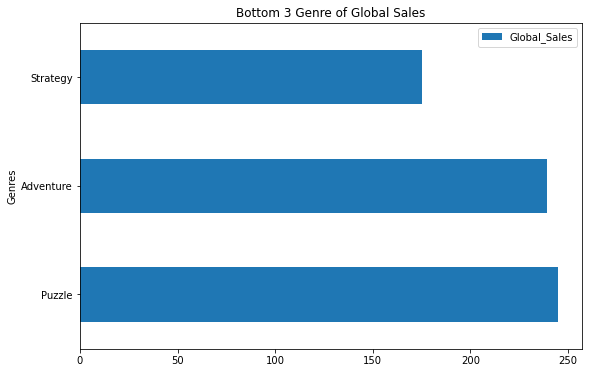

In [59]:
vizSalesGenreBotThree = vizSalesGenre.tail(3).sort_values(by=['Global_Sales'], ascending=False)

cx = vizSalesGenreBotThree.plot.barh(figsize=(9,6), x='Genre', y='Global_Sales')
cx.set_title("Bottom 3 Genre of Global Sales")
cx.set_ylabel('Genres')

### Observation

We see that the Action genre generates roughly \\$1.75 billion of sales while the Sports genre trails by roughly \\$500 million however it still managed to reach the billion mark as its total sales is at \\$1.25 billion dollars. The top 3 barely reached the \\$1 billion mark as it seats at \\$1.037 billion dollars.

Looking at the Bottom 3 Genres, it can be seen that none of it reached a quarter of a billion as the puzzle genre only reached \\$244.95 million


### Top 5 Platforms in Global Sales

After visualizing genre and year, we look at how the top 5 platforms in global sales.

Text(0, 0.5, 'Platforms')

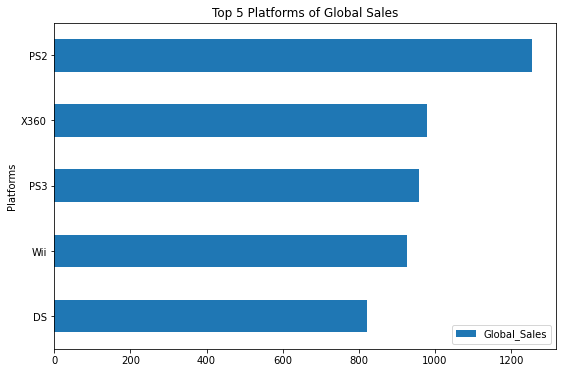

In [62]:
vizSalesPlat = salesPerPlatform.reset_index()

vizSalesPlatTopFive = vizSalesPlat.head(5).sort_values(by=['Global_Sales'],ascending=True)

dx = vizSalesPlatTopFive.plot.barh(figsize=(9,6), x='Platform', y='Global_Sales')
dx.set_title("Top 5 Platforms of Global Sales")
dx.set_ylabel('Platforms')

### Observation

It can be seen that only the PlayStation 2 reached the \\$ 1 billion mark as it has a global sales of \\$1.25 billion. The next two which are the Xbox 360 and Playstation 3 almost reached the billion mark \\$980 and \\$958 million Global Sales respectively.

### Top 5 Publishers

We now move on visualizing the all-time top performing publishers in global sales.

Text(0, 0.5, 'Publishers')

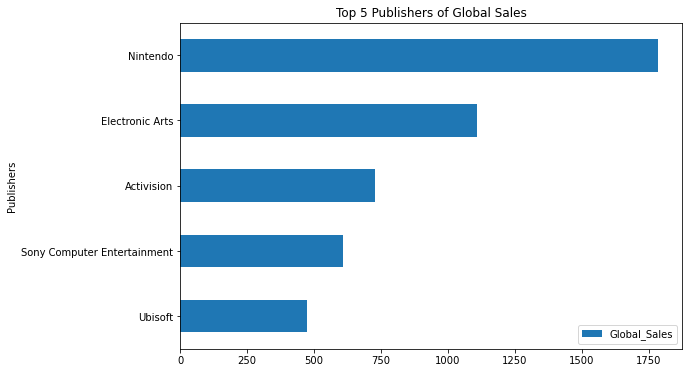

In [93]:
vizSalesPubl = salesPerPublisher.reset_index()

vizSalesPubl5 = vizSalesPubl.head(5).sort_values(by=['Global_Sales'],ascending=True)

ex = vizSalesPubl5.plot.barh(figsize=(9,6), x='Publisher', y='Global_Sales')
ex.set_title("Top 5 Publishers of Global Sales")
ex.set_ylabel('Publishers')

### Observation

We see that only Nintendo and Electronic Arts reached the \\$1 billion mark as these publishers generated \\$1.78 and \\$1.11 billion respectively. It should be noted that the there is a large margin of difference (\\$670 million) between the Top 1 and 2. Activision generated \\$727.46 million, while the last two Sony Computer Entertainment and Ubisoft garnered \\$607 and \\$475 million respectively.



### Top 5 Video Games with The Highest Global Sales

Text(0, 0.5, 'Titles')

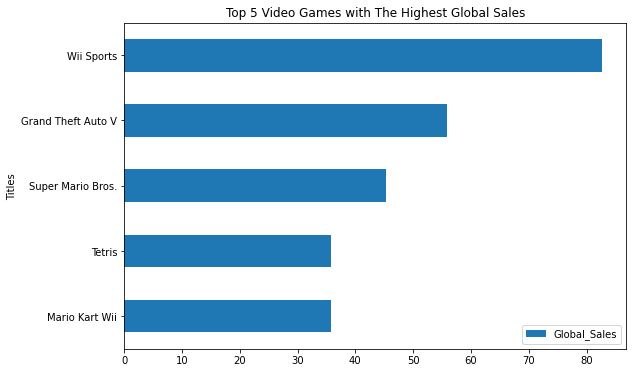

In [95]:
vizSalesTitle = salesPerTitle.reset_index()

vizSalesTitle5 = vizSalesTitle.head(5).sort_values(by=['Global_Sales'],ascending=True)

gx = vizSalesTitle5.plot.barh(figsize=(9,6), x='Name', y='Global_Sales')
gx.set_title("Top 5 Video Games with The Highest Global Sales")
gx.set_ylabel('Titles')

### Observation

Similar to what we noticed in the table, Wii Sports have the highest global sales as it has the revenue of \\$82m. It is followed by Grand Theft Auto V which generate \\$55 million dollars which trails \\$27m from the top 1. It is then followed by Super Mario Bros (\\$45.31m), Tetris(\\$35.84m), and Mario Kart(\\$35.82m)

###  Average Sales Per Region

We now visualize the average sales per region.

Text(0.5, 1.0, 'Average Regional Sales in Percentage')

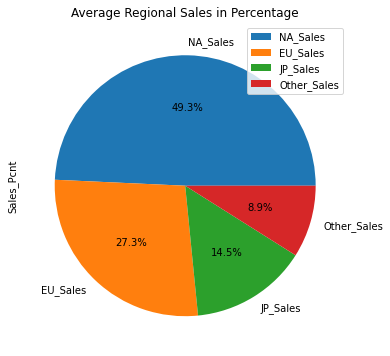

In [80]:
regionalSalesDfTranspose = regionalSalesDf.T
regionalSalesDfTranspose.columns = ['Sales_Pcnt']

regionalSalesDfTranspose
fx = regionalSalesDfTranspose.plot(figsize=(9,6),kind='pie', autopct='%1.1f%%', y='Sales_Pcnt')
fx.set_title('Average Regional Sales in Percentage')


### Observation

Similar to what was observed when analyzing the data, it can be seen that almost half (49.3%) of the global sales comes from North America. On the other hand, more than a quarter or 27.3% of the sales comes from Europe. Lastly, the final 23.4% was shared by Japan 14.5% and the sale of other countries 8.9%.

## Final Remarks

The data provided by Gregory Smith was perhaps outdated since it can be seen that most of the top 5 specifically in terms of year and platforms were from the late 2000s. It can be seen that there were extremely low sales in the years 2017 and 2020 which is suprising if it compared to some of the sales in the 80s. Likewise, the absence of Minecraft which is said to be the highest selling game from the Top 5 or even Top 10 games with the highest global sales is suprising.

In [92]:
data.loc[data['Name']=='Minecraft'].groupby('Name')['Global_Sales'].sum().to_frame()


,Global_Sales
Name,
Minecraft,23.73
